# Preparation
Firstly, I will repeat the steps in the example notebook to get the data and do some basic data cleaning.

In [1]:
import numpy as np
from pymatgen.io.cif import CifParser
from urllib.request import urlopen
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError

m = MPRester("Ua7LfrKkn9yTWA3t")

/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/ext/matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


# Problem Statement
I would like to formulate my classification problem as follows: given a material's descriptors, predict whether it's an insulator or a conductor. I will use the `bandgap_energy_ev` column as the target variable.

As for the regression problem, I would like to predict the band gap of a material given its descriptors.

# Data Cleaning
Firstly, I query for data with anonymous formula `A2B` and `AB2` and drop the `formula` column. Then, I drop all rows with `NaN` values in the `bandgap_energy_ev` column. I also prune out the materials with band gap greater than 7eV, as they are outliers.

In [2]:
results=m.query({"formula_anonymous":"ABC3", "band_gap": {"$lt": 7}},properties=["cif","band_gap"])

100%|██████████| 4353/4353 [00:05<00:00, 738.72it/s]


In [3]:
print(len(results))
results[0:10]

4353


[{'cif': "# generated using pymatgen\ndata_AlPt3C\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   4.18515000\n_cell_length_b   4.18515000\n_cell_length_c   4.18515000\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   AlPt3C\n_chemical_formula_sum   'Al1 Pt3 C1'\n_cell_volume   73.30491331\n_cell_formula_units_Z   1\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Al  Al0  1  0.00000000  0.00000000  0.00000000  1\n  Pt  Pt1  1  0.00000000  0.50000000  0.50000000  1\n  Pt  Pt2  1  0.50000000  0.00000000  0.50000000  1\n  Pt  Pt3  1  0.50000000  0.50000000  0.00000000  1\n  C  C4  1  0.50000000  0.50000000  0.50000000  1\n",
  'band_gap': 0.0},
 {'cif': "# generat

In [11]:
from pymatgen.io.cif import CifParser
from urllib.request import urlopen
import pandas as pd
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
def descriptors(cif):

    atomic_numbers = []

    distance_matrix = []
    van_der_waals_radius = []
    electrical_resistivity = []
    velocity_of_sound = []
    reflectivity = []
    poissons_ratio = []
    molar_volume = []
    thermal_conductivity = []
    melting_point = []
    critical_temperature = []
    superconduction_temperature = []
    liquid_range = []
    bulk_modulus = []
    youngs_modulus = []
    brinell_hardness = []
    rigidity_modulus = []
    # mineral_hardness = []
    vickers_hardness = []
    density_of_solid = []
    coefficient_of_linear_thermal_expansion = []
    average_ionic_radius = []
    average_cationic_radius = []
    average_anionic_radius = []

    parser = CifParser.from_string(cif)

    structure = parser.get_structures()
    structure = structure[0]

    numElements = len(structure.atomic_numbers)

    num_metals = 0
    for e in structure.species:
        if e.Z in range(3, 4+1) or e.Z in range(11, 12+1) or e.Z in range(19, 30+1) or e.Z in range(37, 48+1) or e.Z in range(55, 80 + 1) or e.Z in range(87, 112+1):
            num_metals += 1
    metals_fraction = num_metals/numElements

    spg = structure.get_space_group_info()

    spacegroup_numbers = {}
    for i in range(1, 231):
        spacegroup_numbers[i] = 0

    spacegroup_numbers[spg[1]] = 1

    spacegroup_numbers_list = []
    for i in range(1, 231):
        spacegroup_numbers_list += [spacegroup_numbers[i]]

    atomic_numbers = [np.mean(structure.atomic_numbers), np.max(structure.atomic_numbers), np.min(
        structure.atomic_numbers), np.std(structure.atomic_numbers)]

    # Lattice parameters:
    a_parameters = structure.lattice.abc[0]
    b_parameters = structure.lattice.abc[1]
    c_parameters = structure.lattice.abc[2]
    alpha_parameters = structure.lattice.angles[0]
    beta_parameters = structure.lattice.angles[1]
    gamma_parameters = structure.lattice.angles[2]

    distance_matrix += [np.mean(structure.distance_matrix), np.max(structure.distance_matrix),
                        np.min(structure.distance_matrix), np.std(structure.distance_matrix)]

    e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23 = [
    ], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    for e in structure.species:
        e1 += [e.van_der_waals_radius]
        e2 += [e.electrical_resistivity]
        e3 += [e.velocity_of_sound]
        e4 += [e.reflectivity]
        e6 += [e.poissons_ratio]
        e7 += [e.molar_volume]
        e8 += [e.thermal_conductivity]
        e9 += [e.melting_point]
        e10 += [e.critical_temperature]
        e11 += [e.superconduction_temperature]
        e12 += [e.liquid_range]
        e13 += [e.bulk_modulus]
        e14 += [e.youngs_modulus]
        e15 += [e.brinell_hardness]
        e16 += [e.rigidity_modulus]
        e18 += [e.vickers_hardness]
        e19 += [e.density_of_solid]
        e20 += [e.coefficient_of_linear_thermal_expansion]
        e21 += [e.average_ionic_radius]
        e22 += [e.average_cationic_radius]
        e23 += [e.average_anionic_radius]

    e1 = [0 if v is None else v for v in e1]
    e2 = [0 if v is None else v for v in e2]
    e3 = [0 if v is None else v for v in e3]
    e4 = [0 if v is None else v for v in e4]
    e6 = [0 if v is None else v for v in e6]
    e7 = [0 if v is None else v for v in e7]
    e8 = [0 if v is None else v for v in e8]
    e9 = [0 if v is None else v for v in e9]
    e10 = [0 if v is None else v for v in e10]
    e11 = [0 if v is None else v for v in e11]
    e12 = [0 if v is None else v for v in e12]
    e13 = [0 if v is None else v for v in e13]
    e14 = [0 if v is None else v for v in e14]
    e15 = [0 if v is None else v for v in e15]
    e16 = [0 if v is None else v for v in e16]
    e18 = [0 if v is None else v for v in e18]
    e19 = [0 if v is None else v for v in e19]
    e20 = [0 if v is None else v for v in e20]
    e21 = [0 if v is None else v for v in e21]
    e22 = [0 if v is None else v for v in e22]
    e23 = [0 if v is None else v for v in e23]

    van_der_waals_radius = [np.mean(e1), np.max(e1), np.min(e1), np.std(e1)]
    electrical_resistivity = [np.mean(e2), np.max(e2), np.min(e2), np.std(e2)]
    velocity_of_sound = [np.mean(e3), np.max(e3), np.min(e3), np.std(e3)]
    reflectivity = [np.mean(e4), np.max(e4), np.min(e4), np.std(e4)]
    poissons_ratio = [np.mean(e6), np.max(e6), np.min(e6), np.std(e6)]
    molar_volume = [np.mean(e7), np.max(e7), np.min(e7), np.std(e7)]
    thermal_conductivity = [np.mean(e8), np.max(e8), np.min(e8), np.std(e8)]
    melting_point = [np.mean(e9), np.max(e9), np.min(e9), np.std(e9)]
    critical_temperature = [np.mean(e10), np.max(
        e10), np.min(e10), np.std(e10)]
    superconduction_temperature = [
        np.mean(e11), np.max(e11), np.min(e11), np.std(e11)]
    liquid_range = [np.mean(e12), np.max(e12), np.min(e12), np.std(e12)]
    bulk_modulus = [np.mean(e13), np.max(e13), np.min(e13), np.std(e13)]
    youngs_modulus = [np.mean(e14), np.max(e14), np.min(e14), np.std(e14)]
    brinell_hardness = [np.mean(e15), np.max(e15), np.min(e15), np.std(e15)]
    rigidity_modulus = [np.mean(e16), np.max(e16), np.min(e16), np.std(e16)]
    vickers_hardness = [np.mean(e18), np.max(e18), np.min(e18), np.std(e18)]
    density_of_solid = [np.mean(e19), np.max(e19), np.min(e19), np.std(e19)]
    coefficient_of_linear_thermal_expansion = [
        np.mean(e20), np.max(e20), np.min(e20), np.std(e20)]
    average_ionic_radius = [np.mean(e21), np.max(
        e21), np.min(e21), np.std(e21)]
    average_cationic_radius = [
        np.mean(e22), np.max(e22), np.min(e22), np.std(e22)]
    average_anionic_radius = [
        np.mean(e23), np.max(e23), np.min(e23), np.std(e23)]

    V = a_parameters*b_parameters*c_parameters
    Density = V / numElements

    descriptors_list = atomic_numbers +\
        [Density] +\
        [alpha_parameters] +\
        [beta_parameters] +\
        [gamma_parameters] +\
        [metals_fraction] +\
        distance_matrix +\
        van_der_waals_radius +\
        electrical_resistivity +\
        velocity_of_sound +\
        reflectivity +\
        poissons_ratio +\
        molar_volume +\
        thermal_conductivity +\
        melting_point +\
        critical_temperature +\
        superconduction_temperature +\
        liquid_range +\
        bulk_modulus +\
        youngs_modulus +\
        brinell_hardness +\
        rigidity_modulus +\
        vickers_hardness +\
        density_of_solid +\
        coefficient_of_linear_thermal_expansion +\
        average_ionic_radius +\
        average_cationic_radius +\
        average_anionic_radius +\
        spacegroup_numbers_list
    return descriptors_list

In [6]:
band_gaps = []
dataset = []

counter =0
for r in results:
    cif = r['cif']
    bg = r['band_gap']
    parser = CifParser.from_string(cif)

    structure = parser.get_structures()
    structure = structure[0]

    dataset += [descriptors(cif)]

    band_gaps += [bg]
    print(counter)
    counter +=1

dataset_df = pd.DataFrame(dataset)


/tmp/ipykernel_143763/178056419.py:8: DeprecationWarning: `from_string` is deprecated!
Use from_str instead
  parser = CifParser.from_string(cif)
/tmp/ipykernel_143763/178056419.py:10: DeprecationWarning:         `get_structures` is deprecated!
        get_structures is deprecated and will be removed in 2024. Use parse_structures instead.The only difference is that primitive defaults to False in the new parse_structures method.So parse_structures(primitive=True) is equivalent to the old behavior of get_structures().
  structure = parser.get_structures()
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/io/cif.py:1186: UserWarning: The default value of primitive was changed from True to False in https://github.com/materialsproject/pymatgen/pull/3419. CifParser now returns the cell in the CIF file as is. If you want the primitive cell, please set primitive=True explicitly.
  warnings.warn(
/tmp/ipykernel_143763/1757690246.py:29: DeprecationWarning: `from_string` is de

0
1
2
3
4
5
6
7


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for poissons_ratio for Sb
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Sb
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for superconduction_temperature for Sb
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for vickers_hardness for Sb
  warnings.warn(f"No data available for {item} for {self.symbol}")


8
9
10
11
12
13


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for velocity_of_sound for Sc
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Sc
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Sc
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for vickers_hardness for Sc
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserW

14
15
16
17
18
19


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for poissons_ratio for Si
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Si
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for superconduction_temperature for Si
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for brinell_hardness for Si
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.p

20


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for K
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for poissons_ratio for K
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for superconduction_temperature for K
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for youngs_modulus for K
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWar

21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Er
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Er
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for superconduction_temperature for Er
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Ga
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186:

36
37
38
39
40
41
42
43
44
45
46
47
48


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Sm
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Sm
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for superconduction_temperature for Sm
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Na
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186:

49
50
51
52
53
54
55
56
57
58
59
60
61
62


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Pr
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Pr
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for superconduction_temperature for Pr
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Cd
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table

63
64
65
66
67
68
69
70
71
72
73
74
75
76


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Ho
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Ho
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for superconduction_temperature for Ho
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Ru
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186:

77
78
79
80
81
82
83
84
85
86


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Au
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for superconduction_temperature for Au
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for velocity_of_sound for Lu
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Lu
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py

87
88
89
90
91
92
93
94
95
96
97
98
99
100


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Ag
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for superconduction_temperature for Ag
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Nd
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Nd
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table

101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for velocity_of_sound for Pm
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Pm
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Pm
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for superconduction_temperature for Pm
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py

138
139
140
141
142
143
144
145
146


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 16 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


147
148


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Nb
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Nb
  warnings.warn(f"No data available for {item} for {self.symbol}")


149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Gd
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Gd
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for brinell_hardness for Gd
  warnings.warn(f"No data available for {item} for {self.symbol}")


184
185
186
187
188
189
190
191
192
193
194
195
196
197


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 12 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


198
199
200
201
202
203
204
205
206


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Re
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Re
  warnings.warn(f"No data available for {item} for {self.symbol}")


207
208
209
210
211
212
213
214
215
216
217
218
219
220
221


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Zn
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for vickers_hardness for Zn
  warnings.warn(f"No data available for {item} for {self.symbol}")


222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Tb
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Tb
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for superconduction_temperature for Tb
  warnings.warn(f"No data available for {item} for {self.symbol}")


260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for velocity_of_sound for Tc
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Tc
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for poissons_ratio for Tc
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for critical_temperature for Tc
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWar

453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for electrical_resistivity for Ac
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for velocity_of_sound for Ac
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for reflectivity for Ac
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for poissons_ratio for Ac
  warnings.warn(f"No data available for {item} for {self.symbol}")
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/core/periodic_table.py:186: UserW

606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 1 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136

spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 0 tolerance = 1.000000e-02 failed(line 800, /project/src/spacegroup.c).


1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401


spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 0 tolerance = 1.000000e-02 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 1 tolerance = 9.500000e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 2 tolerance = 9.025000e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 3 tolerance = 8.573750e-03 failed(line 800, /project/src/spacegroup.c).


1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 20 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 14 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 3 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892


spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 0 tolerance = 1.000000e-02 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 1 tolerance = 9.500000e-03 failed(line 800, /project/src/spacegroup.c).


3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 36 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 24 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413


/home/exaclior/.conda/envs/ml4m/lib/python3.10/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 6 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613


In [13]:
def label_material(band_gap):
    if band_gap > 3:
        return 'insulator'
    else:
        return 'conductor'

dataset_df['material_type'] = [label_material(bg) for bg in band_gaps]

Let's take a look at the distribution of the band gap like the example did.

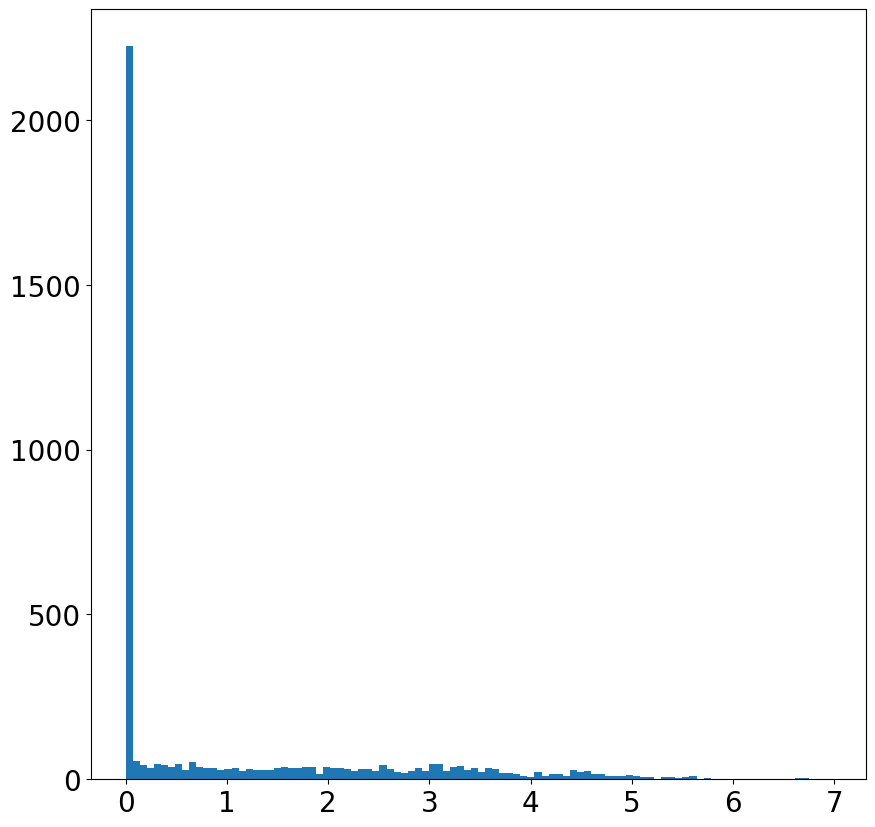

In [7]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(10, 10))
plt.hist(band_gaps, bins=100)
plt.savefig('Histogram_PDF', bbox_inches='tight')

Let's also take a look at the distribution of insulators and conductors.

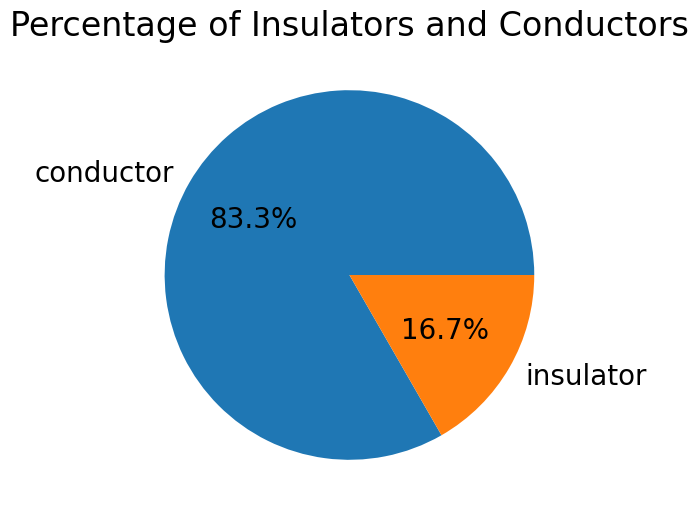

In [14]:
# Get the counts of each label
label_counts = dataset_df['material_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(label_counts, labels = label_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Insulators and Conductors')
plt.show()

Although the distribution is skewed, we still have considerable amount of data in the region where the band gap is between 3eV and 7eV, we should have enough training data for the classification problem. Let's spilt these bad boys into training and test sets.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset_df, band_gaps, test_size=.2, random_state=None)

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regression Problem
Let's first do the regression problem. I will use the same scoring criteria as the example notebook, which is the mean absolute error (MAE). I will use the same models as the example notebook, which are the random forest regressor and the gradient boosting regressor.

RF MAE	0.539734047531573

RF R2	0.700668204922593

XGBOOST MAE	0.5093056521690182

XGBOOST R2	0.6978178225277035



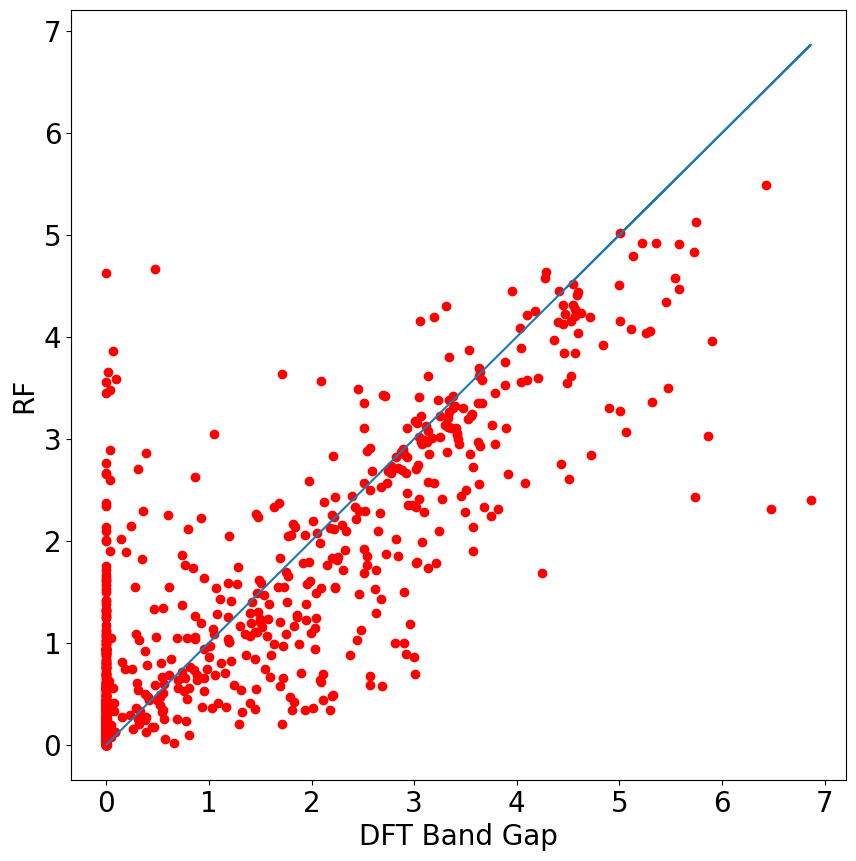

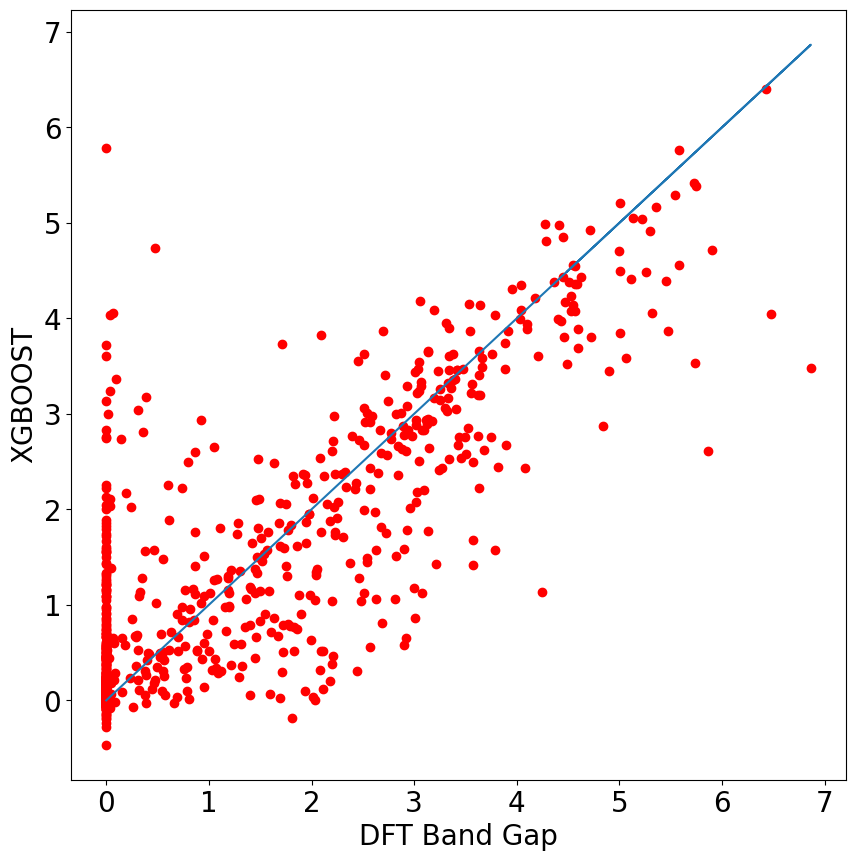

In [22]:
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=500, max_depth=500, random_state=2)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('RF MAE\t'+str(mean_absolute_error(y_test, y_predicted))+'\n')
print('RF R2\t'+str(r2_score(y_test, y_predicted))+'\n')

xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RF')
plt.xlabel('DFT Band Gap')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')


regr = XGBRegressor(objective='reg:squarederror', max_depth=10, n_estimators=400)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('XGBOOST MAE\t'+str(mean_absolute_error(y_test, y_predicted))+'\n')
print('XGBOOST R2\t'+str(r2_score(y_test, y_predicted))+'\n')


xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT Band Gap')
plt.savefig('XGBOOST_Correlation_Test', bbox_inches='tight')

# Classification Problem
Now, let's carry out the classification problem and predict which material is an insulator and which is a conductor. I will use the same scoring criteria as the example notebook, which is the accuracy score. I will use the same models as the example notebook, which are the random forest classifier and the gradient boosting classifier.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [18]:
# Assuming your features are all columns except 'material_type'
X = dataset_df.drop('material_type', axis=1)
y = dataset_df['material_type']

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train2, y_train2)

# Make predictions
rf_predictions = rf2.predict(X_test2)

# Evaluate the model
rf_accuracy = accuracy_score(y_test2, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')


Random Forest Accuracy: 0.9357060849598163


In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Fit the encoder and transform the labels
y_train2 = le.fit_transform(y_train2)
y_test2 = le.transform(y_test2)

# Now you can train your model
xgb2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb2.fit(X_train2, y_train2)


# Make predictions
xgb_predictions2 = xgb2.predict(X_test2)

# Evaluate the model
xgb_accuracy2 = accuracy_score(y_test2, xgb_predictions2)
print(f'XGBoost Accuracy: {xgb_accuracy2}')

# Convert the predictions back to original labels
xgb_predictions2 = le.inverse_transform(xgb_predictions2)


XGBoost Accuracy: 0.9334098737083811


# Summary
In this notebook, I have formulated my classification problem as follows: given a material's descriptors, predict whether it's an insulator or a conductor. I have also used `bandgap_energy_ev` as the target variable for the regression problem. 

It turns out that the random forest regressor and the gradient boosting regressor have similar performance, with the gradient boosting regressor having a slightly worse performance. The random forest classifier and the gradient boosting classifier also have similar performance, with the gradient boosting classifier having a slightly worse performance.

The classification is easier than the regression problem, as the accuracy score is higher than the MAE. This is because the classification problem is a binary classification problem, while the regression problem is a regression problem. 